In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv(r"C:\Users\aadit\Downloads\train-chennai-sale.csv")

In [104]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Supervised regression Problem
we have a target variable df['SALES_PRICE'] and the type of target variable is continuous.since we are trying tp predict a continous value,it is called Regression Problem

In [105]:
df.shape

(7109, 22)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [107]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [108]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

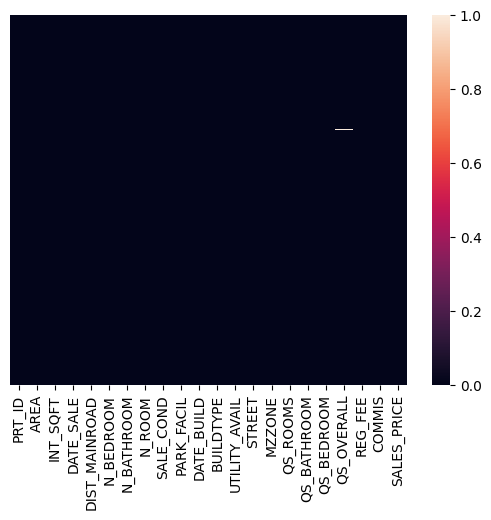

In [109]:
sns.heatmap(df.isnull(),yticklabels=False)

In [110]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [111]:
df1= df.drop(['PRT_ID','REG_FEE','COMMIS'],axis = 1)

In [112]:
df1

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [113]:
print('the total number of features:',df1.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

the total number of features: 19


,object,int64,float64
0,10,6,6


# Categorical Features 

In [114]:
categorical_features = [x for x in df1.columns if df1[x].dtypes=='O']
print(len(categorical_features))
categorical_features

9


['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

# Numerical Features

In [115]:
numerical_features = [x for x in df1.columns if df1[x].dtypes != 'O']
print(len(numerical_features))
numerical_features

10


['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

In [116]:
df1.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

# filling the Null Values

In [117]:
df1['N_BEDROOM']= df1['N_BEDROOM'].fillna(df1['N_BEDROOM'].mode()[0])
df1['N_BATHROOM']= df1['N_BATHROOM'].fillna(df1['N_BATHROOM'].mode()[0])
df1['QS_OVERALL']= df1['QS_OVERALL'].fillna(df1['QS_OVERALL'].mean())

In [118]:
df1.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 480, dtype: int64

In [119]:
df1.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

# Spelling Corrections.

In [120]:
df2=df1
df2

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [121]:
df2.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [122]:
df2.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [123]:
df2['AREA'].replace(['Chrompt','Chrmpet','Chormpet','TNagar','Karapakam','Ana Nagar','Velchery','Ann Nagar','Adyr','KKNagar'],
                   ['Chrompet','Chrompet','Chrompet','T Nagar','Karapakkam','Anna Nagar','Velachery','Anna Nagar','Adyar','KK Nagar'],inplace=True)

In [124]:
df2['SALE_COND'].replace(['Adj Land','Ab Normal','Partiall','PartiaLl'],
                         ['AdjLand','AbNormal','Partial','Partial'],inplace=True)

In [125]:
df2['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)

In [126]:
df2['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'],inplace=True)

In [127]:
df2['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)


In [128]:
df2['STREET'].replace(['Pavd','NoAccess'],['Paved','NoAccess'],inplace=True)

In [129]:
df2['STREET'].replace(['NoAccess'],['No Access'],inplace=True)

# Creating new feature for date_sale&date_build

In [130]:
df2['DATE_SALE']=pd.to_datetime(df2['DATE_SALE'])
df2['DATE_BUILD']=pd.to_datetime(df2['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64
0,10,6,6


In [131]:
df2['Build_Year']=df2['DATE_BUILD'].dt.year
df2['Sale_Year']=df2['DATE_SALE'].dt.year

In [132]:
df2['Sold_Age']=df2['Sale_Year']-df2['Build_Year']


In [133]:
df3=df2.drop(['DATE_SALE','DATE_BUILD','Sale_Year','Build_Year'],axis=1)

In [134]:
df3

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Sold_Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,No Sewer,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,No Sewer,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


# Exploratory Data Analysis
univariate and bivariate Analysis for categorical_features

In [135]:
categorical_features = [x for x in df3.columns if df3[x].dtypes=='O']
print(len(categorical_features))
categorical_features

7


['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [136]:
numerical_features = [x for x in df3.columns if df3[x].dtypes != 'O']
print(len(numerical_features))
numerical_features

11


['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'Sold_Age']

### Area

Text(0, 0.5, 'No of houses')

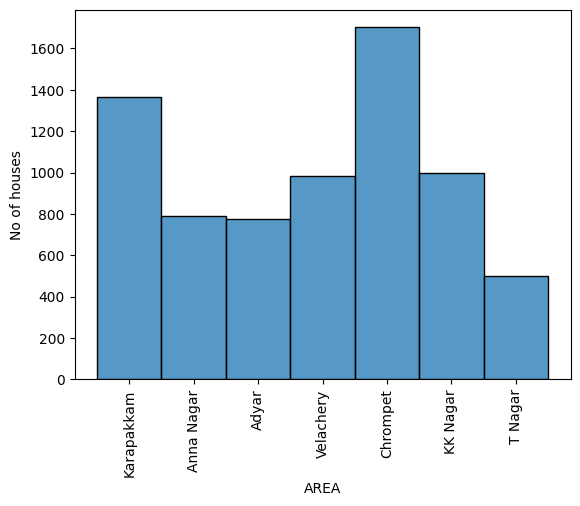

In [137]:
#univariate
sns.histplot(df3['AREA'])
plt.xticks(rotation='vertical')
plt.ylabel('No of houses')

Text(0, 0.5, 'No of houses')

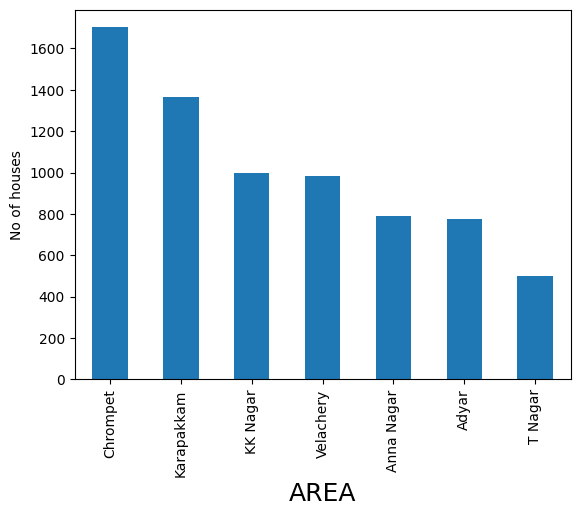

In [138]:
df3['AREA'].value_counts().plot(kind='bar')
plt.xlabel('AREA',fontsize = 18)
plt.ylabel('No of houses')

In [139]:
df3['AREA'].value_counts()/len(df3)*100

Chrompet      23.941483
Karapakkam    19.215079
KK Nagar      14.024476
Velachery     13.799409
Anna Nagar    11.084541
Adyar         10.887607
T Nagar        7.047405
Name: AREA, dtype: float64

1. chrompet has the highest property count around 24%
2. t nagar has the lowest property count of 7%

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Karapakkam'),
  Text(1, 0, 'Adyar'),
  Text(2, 0, 'Chrompet'),
  Text(3, 0, 'Velachery'),
  Text(4, 0, 'KK Nagar'),
  Text(5, 0, 'Anna Nagar'),
  Text(6, 0, 'T Nagar')])

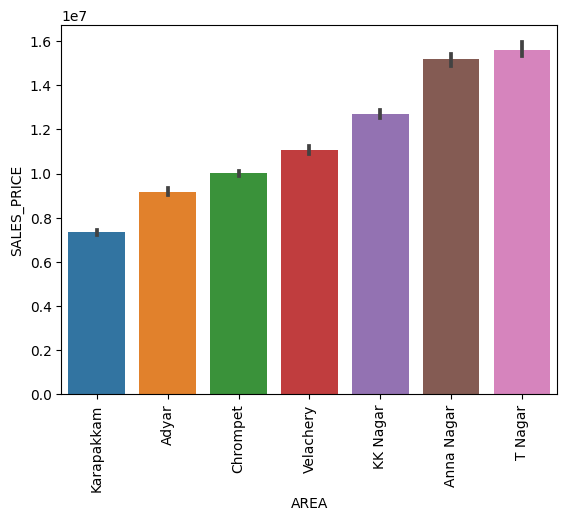

In [140]:
#bivariate
sns.barplot(x= df3['AREA'],y=df3['SALES_PRICE'],order=df3.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation='vertical')

In [141]:
df3.groupby('AREA').SALES_PRICE.median().sort_values()

AREA
Karapakkam     7043125.0
Adyar          8878350.0
Chrompet       9606725.0
Velachery     10494410.0
KK Nagar      12146740.0
Anna Nagar    13727895.0
T Nagar       14049650.0
Name: SALES_PRICE, dtype: float64

1. we found that T nagar has lowest property count (7%) but it has the most expensive median sales price (14049650.0).
2. Anna nagar has property counts higher(11%) than t nagar(7%) and the sale price is(13727895.0) also close to t nagar
3. karapakkam has the cheapest property sales price.
4. the sales price of houses can increase with extra facilities and BUILD TYPE

### build type

Text(0, 0.5, 'No of houses')

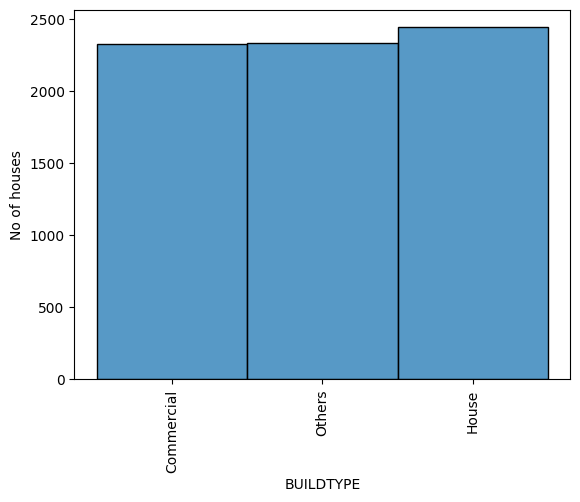

In [142]:
#univariate
sns.histplot(df3['BUILDTYPE'])
plt.xticks(rotation='vertical')
plt.ylabel('No of houses')

Text(0, 0.5, 'No of houses')

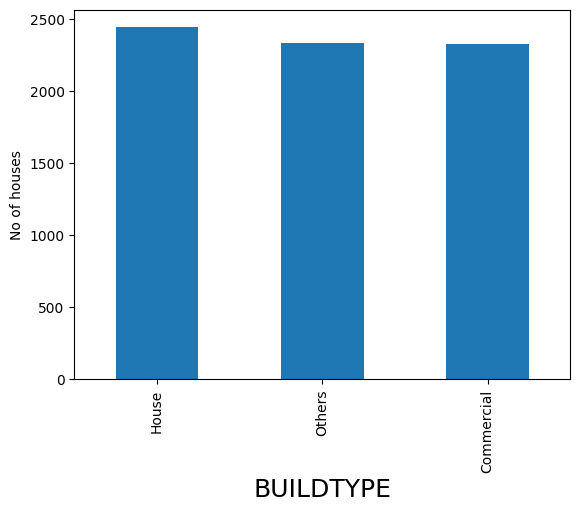

In [143]:
df3['BUILDTYPE'].value_counts().plot(kind='bar')
plt.xlabel('BUILDTYPE',fontsize = 18)
plt.ylabel('No of houses')

In [144]:
df3['BUILDTYPE'].value_counts()/len(df3)*100

House         34.378956
Others        32.859755
Commercial    32.761289
Name: BUILDTYPE, dtype: float64

1. the house build type has the highest property count(34%)

(array([0, 1, 2]),
 [Text(0, 0, 'House'), Text(1, 0, 'Others'), Text(2, 0, 'Commercial')])

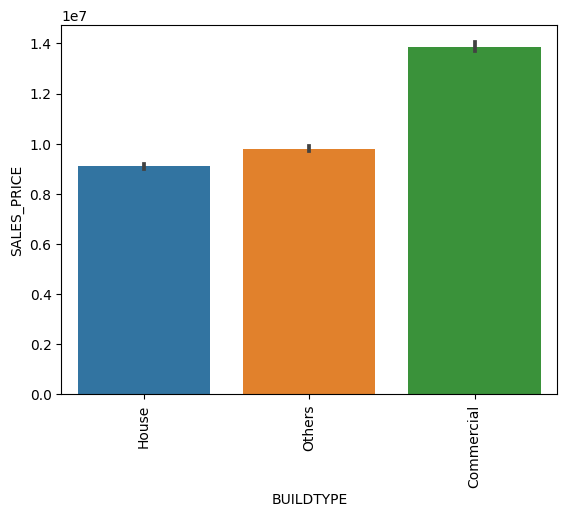

In [145]:
# bivariate
sns.barplot(x= df3['BUILDTYPE'],y=df3['SALES_PRICE'],order=df3.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation='vertical')

In [146]:
df3.groupby('BUILDTYPE').SALES_PRICE.median().sort_values()

BUILDTYPE
House          8985370.0
Others         9637260.0
Commercial    13356200.0
Name: SALES_PRICE, dtype: float64

1. the commercial build type has the expensive median property rate(13356200.0)
2. lets compare it with area (t nagar and anna nagar)

Text(0, 0.5, 'House')

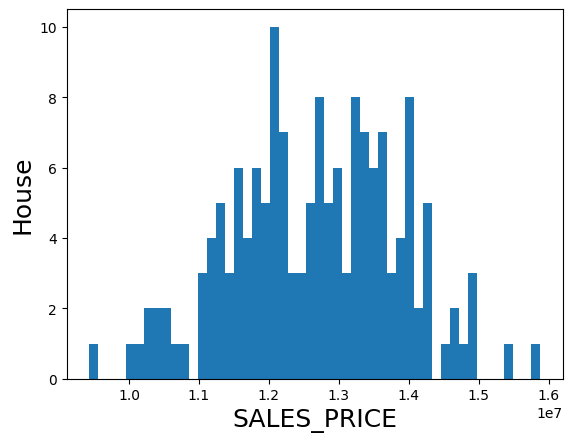

In [147]:
comp_a = df3.loc[(df3['BUILDTYPE']=='House')&(df3['AREA']=='T Nagar')]
comp_a['SALES_PRICE'].plot.hist(bins=50)
# plt.xticks(rotation='vertical')
plt.xlabel('SALES_PRICE',fontsize = 18)
plt.ylabel('House',fontsize = 18)


Text(0, 0.5, 'Others')

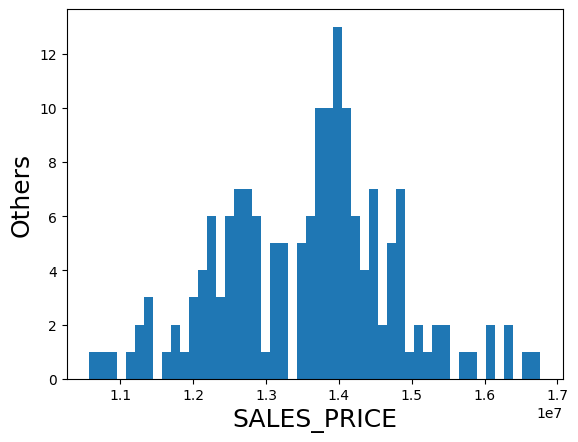

In [148]:
comp_a = df3.loc[(df3['BUILDTYPE']=='Others')&(df3['AREA']=='T Nagar')]
comp_a['SALES_PRICE'].plot.hist(bins=50)
# plt.xticks(rotation='vertical')
plt.xlabel('SALES_PRICE',fontsize = 18)
plt.ylabel('Others',fontsize = 18)

Text(0, 0.5, 'Commercial')

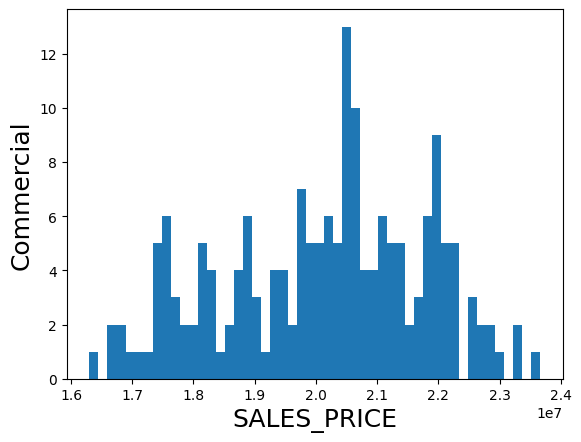

In [149]:
comp_a = df3.loc[(df3['BUILDTYPE']=='Commercial')&(df3['AREA']=='T Nagar')]
comp_a['SALES_PRICE'].plot.hist(bins=50)
# plt.xticks(rotation='vertical')
plt.xlabel('SALES_PRICE',fontsize = 18)
plt.ylabel('Commercial',fontsize = 18)

Text(0, 0.5, 'Commercial')

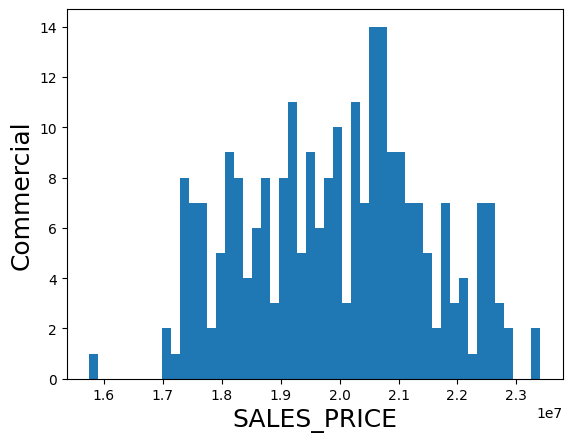

In [150]:
comp_a = df3.loc[(df3['BUILDTYPE']=='Commercial')&(df3['AREA']=='Anna Nagar')]
comp_a['SALES_PRICE'].plot.hist(bins=50)
# plt.xticks(rotation='vertical')
plt.xlabel('SALES_PRICE',fontsize = 18)
plt.ylabel('Commercial',fontsize = 18)

Text(0, 0.5, 'Commercial')

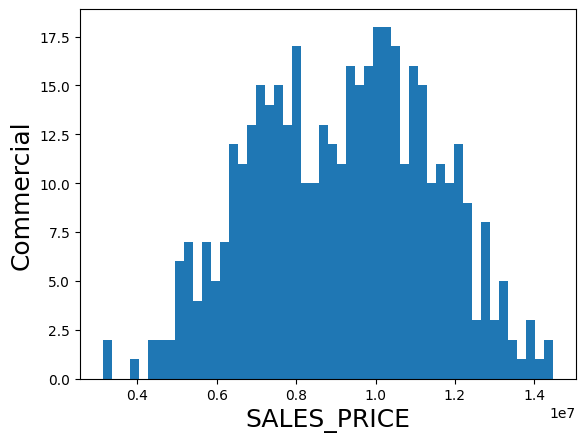

In [151]:
comp_a = df3.loc[(df3['BUILDTYPE']=='Commercial')&(df3['AREA']=='Karapakkam')]
comp_a['SALES_PRICE'].plot.hist(bins=50)
# plt.xticks(rotation='vertical')
plt.xlabel('SALES_PRICE',fontsize = 18)
plt.ylabel('Commercial',fontsize = 18)

1. this graph shows that build type house itself is expensive in t nagar
2. there are more commercial build type property in Anna nagar than T nagar with comparatively more or less sales price
3. graph for karapakkam shows that even commercial build type is cheap compare to t nagar house build type 

### SALE_COND

In [152]:
#univariate
df3['SALE_COND'].value_counts().sort_values()/len(df3)*100

Family         19.735546
AbNormal       19.848080
Normal Sale    20.016880
Partial        20.157547
AdjLand        20.241947
Name: SALE_COND, dtype: float64

1. the highest type of sale conducted was AdjLand(20.2%) and Partial(20.1%)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

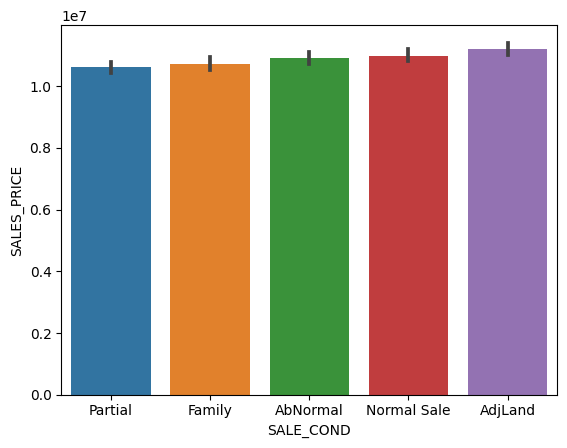

In [153]:
# bivariate
sns.barplot(data=df3,x='SALE_COND',y='SALES_PRICE',order=df3.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

### PARK_FACIL

In [154]:
#univariate
df3['PARK_FACIL'].value_counts()/len(df3)*100

Yes    50.457167
No     49.542833
Name: PARK_FACIL, dtype: float64

1. 50% of the property has parking facilities 

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

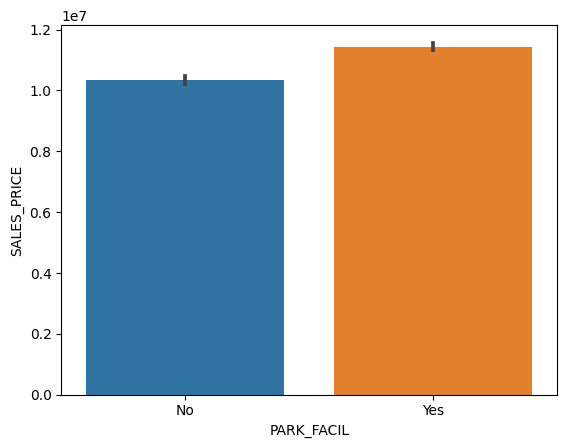

In [155]:
#bivariate
sns.barplot(data=df3,x='PARK_FACIL',y='SALES_PRICE',order=df3.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

In [156]:
df3.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median().sort_values()

BUILDTYPE   PARK_FACIL
House       No             8514140.0
Others      No             9104645.0
House       Yes            9468150.0
Others      Yes           10039405.0
Commercial  No            12692985.0
            Yes           13920600.0
Name: SALES_PRICE, dtype: float64

1. houses with parking facilities have higher sales price
2. and we found that parking facility is a important feature in ths dataset
3. the difference between commercial property having a parking facility is about (12,27,615) and for a house property (9,54,010)
4. thus paking facility will increase the sales price

### UTILITY_AVAIL

In [157]:
#univariate
df3.UTILITY_AVAIL.value_counts().sort_values()/len(df3)*100

ELO         21.409481
AllPub      26.543818
No Sewer    52.046701
Name: UTILITY_AVAIL, dtype: float64

1. the utility availability of the property in this dataset has 52% of no sewer


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

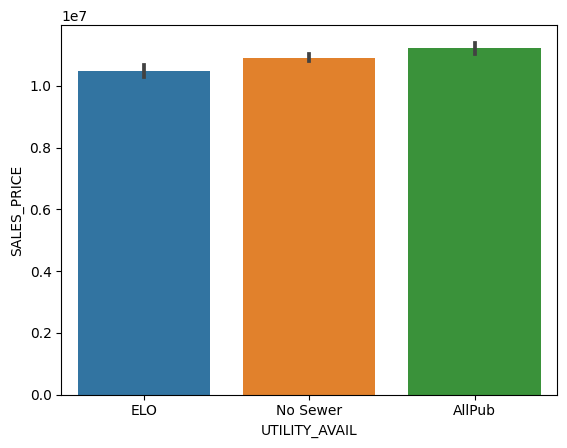

In [158]:
sns.barplot(data=df3,x='UTILITY_AVAIL',y='SALES_PRICE',order=df3.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

In [159]:
#bivariate
df3.groupby(['UTILITY_AVAIL','BUILDTYPE']).SALES_PRICE.median().sort_values()

UTILITY_AVAIL  BUILDTYPE 
ELO            House          8418025.0
No Sewer       House          9060600.0
ELO            Others         9071125.0
AllPub         House          9329120.0
No Sewer       Others         9758650.0
AllPub         Others         9908685.0
ELO            Commercial    12900790.0
No Sewer       Commercial    13439660.0
AllPub         Commercial    13604080.0
Name: SALES_PRICE, dtype: float64

1. allpub UTILITY in all build type is expensive 
2. lets compare this with parking facility

In [160]:
df3.groupby(['UTILITY_AVAIL','PARK_FACIL','BUILDTYPE']).SALES_PRICE.median().sort_values()

UTILITY_AVAIL  PARK_FACIL  BUILDTYPE 
ELO            No          House          7834855.0
                           Others         8602280.0
No Sewer       No          House          8636690.0
AllPub         No          House          8903425.0
ELO            Yes         House          8972770.0
No Sewer       No          Others         9252155.0
ELO            Yes         Others         9441460.0
No Sewer       Yes         House          9562650.0
AllPub         No          Others         9575120.0
               Yes         House          9651940.0
No Sewer       Yes         Others        10147125.0
AllPub         Yes         Others        10239375.0
ELO            No          Commercial    12212000.0
No Sewer       No          Commercial    12742485.0
AllPub         No          Commercial    12905750.0
ELO            Yes         Commercial    13514885.0
No Sewer       Yes         Commercial    13903950.0
AllPub         Yes         Commercial    14211600.0
Name: SALES_PRICE, dtype: 

1. we found that property with allpub utility facility and a parking facility has highest sales price


### STREET

In [161]:
#univariate
df3.STREET.value_counts().sort_values()/len(df3)*100

No Access    28.372486
Gravel       35.448024
Paved        36.179491
Name: STREET, dtype: float64

In [162]:
#bivariate
df3.groupby('STREET').SALES_PRICE.median().sort_values()

STREET
No Access     9406050.0
Paved        10470070.0
Gravel       10847225.0
Name: SALES_PRICE, dtype: float64

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

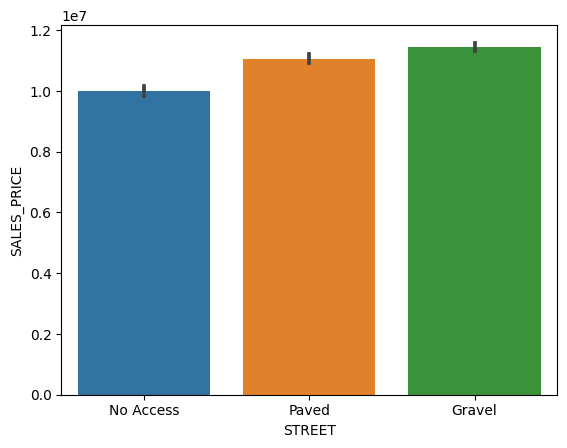

In [163]:
sns.barplot(data=df3,x='STREET',y='SALES_PRICE',order=df3.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

In [164]:
df3.groupby(['STREET','UTILITY_AVAIL']).SALES_PRICE.median().sort_values()

STREET     UTILITY_AVAIL
Paved      ELO               9214930.0
No Access  No Sewer          9217950.0
           ELO               9487400.0
           AllPub            9742325.0
Gravel     ELO              10089355.0
Paved      No Sewer         10633810.0
           AllPub           10885120.0
Gravel     No Sewer         11000785.0
           AllPub           11068255.0
Name: SALES_PRICE, dtype: float64

1. properties with gravel streets are expensive 
2. when compare with UTILITY_AVAIL we got more insights 


In [165]:
df3.groupby(['STREET','UTILITY_AVAIL','PARK_FACIL','BUILDTYPE']).SALES_PRICE.median().sort_values()

STREET     UTILITY_AVAIL  PARK_FACIL  BUILDTYPE 
No Access  AllPub         No          House          7358650.0
           ELO            No          House          7488915.0
           No Sewer       No          House          7720300.0
Paved      ELO            No          House          7869860.0
No Access  ELO            No          Others         8007290.0
           AllPub         No          Others         8164875.0
           No Sewer       No          Others         8194735.0
Gravel     ELO            No          House          8236682.5
No Access  AllPub         Yes         House          8297500.0
           No Sewer       Yes         House          8300800.0
           ELO            Yes         House          8361750.0
Paved      ELO            No          Others         8554890.0
           No Sewer       No          House          8677280.0
           ELO            Yes         House          8860120.0
No Access  No Sewer       Yes         Others         9026050.0
Paved 

this comaparison tells lot about the features value

### MZZONE

In [166]:
#univariate
df3.MZZONE.value_counts()/len(df3)*100

RL    26.135884
RH    25.629484
RM    25.559150
C      7.736672
A      7.553805
I      7.385005
Name: MZZONE, dtype: float64

Text(0.5, 0, 'MZZONE')

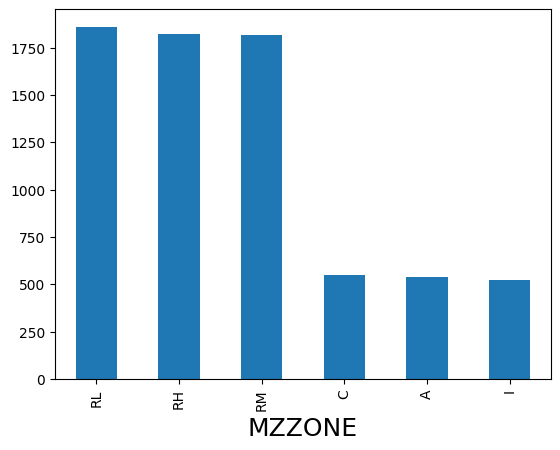

In [167]:
df3['MZZONE'].value_counts().plot(kind='bar')
plt.xlabel('MZZONE',fontsize = 18)


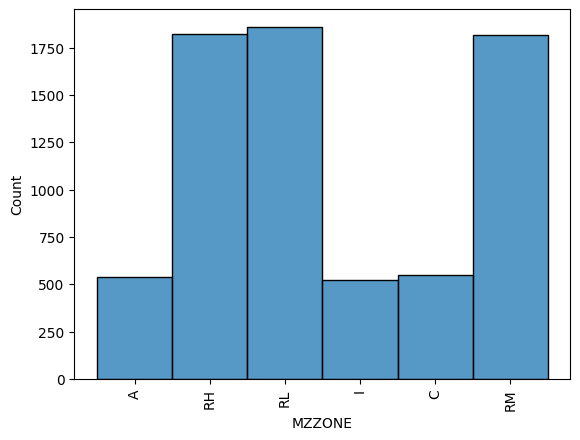

In [168]:
sns.histplot(df3['MZZONE'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

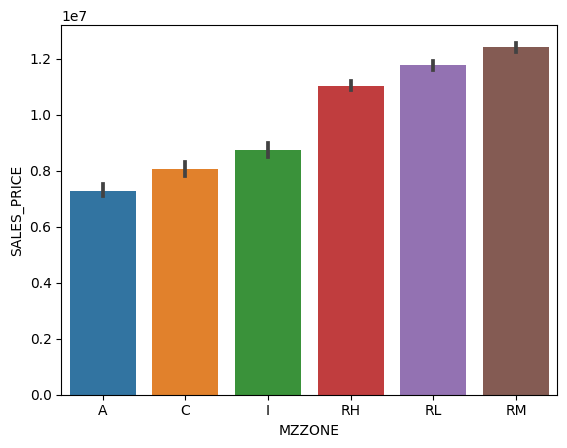

In [169]:
sns.barplot(data=df3,x='MZZONE',y='SALES_PRICE',order=df3.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

1. houses in agricultural zone are cheaper
2. residential zones are costlier than agriculture,commercial,industrial  
3. residence zone with medium density are costlier

In [170]:
df3.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
Sold_Age           int64
dtype: object

In [171]:
df3['N_BEDROOM']=df3['N_BEDROOM'].astype(int)

In [172]:
df3['N_BATHROOM']=df3['N_BATHROOM'].astype(int)

In [173]:
df3.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int32
N_BATHROOM         int32
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
Sold_Age           int64
dtype: object

## Finding IQR

In [174]:
percentile25=df3['SALES_PRICE'].quantile(0.25)
percentile75=df3['SALES_PRICE'].quantile(0.75)
IQR=percentile75-percentile25
print('the 25th percentile of sales_price data :',percentile25)
print('the 75th percentile of sales_price data is:',percentile75)
print('IQR:',IQR)

the 25th percentile of sales_price data : 8272100.0
the 75th percentile of sales_price data is: 12993900.0
IQR: 4721800.0


## Max and Min Limits

In [175]:
max_value=percentile75+1.5*IQR
min_value=percentile25-1.5*IQR
print(max_value)
print(min_value)

20076600.0
1189400.0


1. the medium price of hous is around (47,21,800)
2. the lowest price of the house is (11,89,400)
3. the highest price of the house is (2,00,76,600) aaccording to the dataset

# Exploratory Data Analysis
univariate and bivariate Analysis for numerical_features

### INT_SQFT

<AxesSubplot:ylabel='Frequency'>

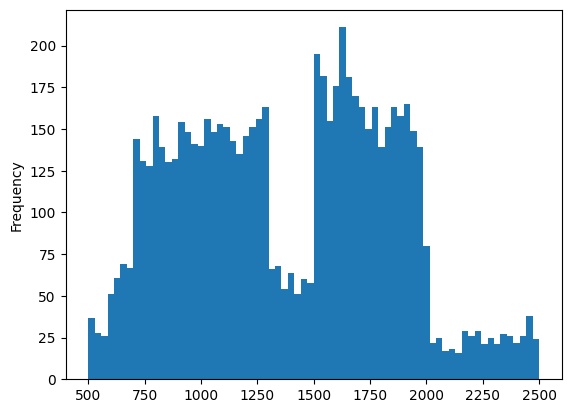

In [176]:
df3['INT_SQFT'].plot.hist(bins=70)

1. most of the house have >750 and <1300 sqft and 1500 to 2000sqft
2. very few house have > 750 sqft and >2000 sqft

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


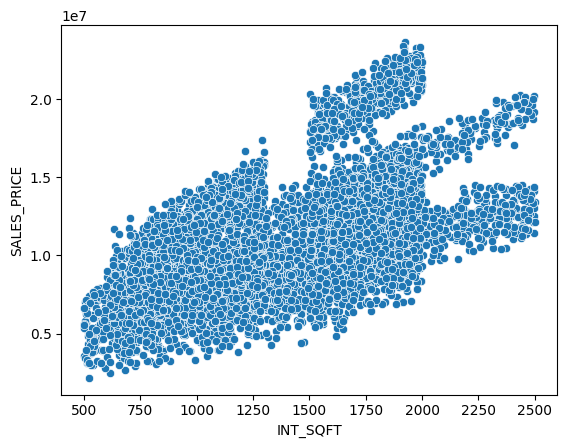

In [177]:
sns.scatterplot(data=df3,x='INT_SQFT',y='SALES_PRICE')
df3[['INT_SQFT','SALES_PRICE']].corr()

1. it has linear relationship
2. we can observe that with increase in sqft there is increasing in price

### DIST_MAINROAD

<AxesSubplot:ylabel='Frequency'>

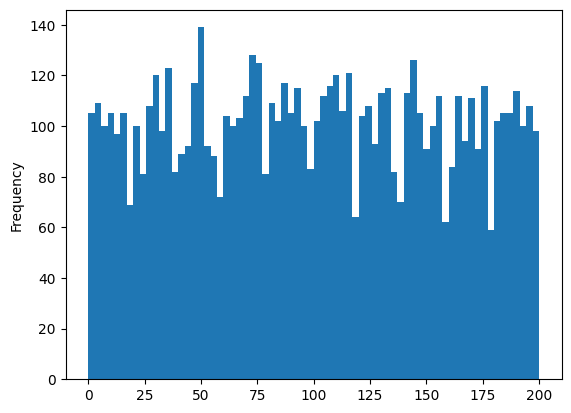

In [178]:
df3['DIST_MAINROAD'].plot.hist(bins=70)

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


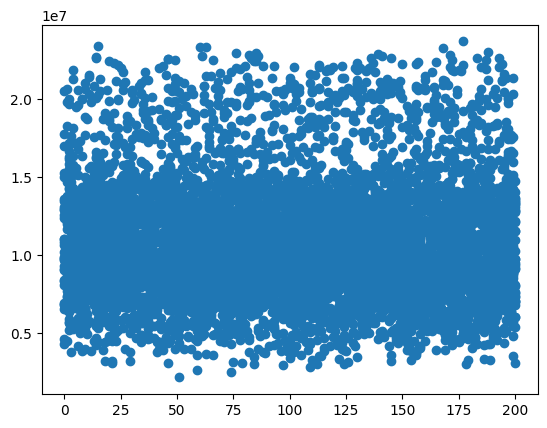

In [179]:
plt.scatter(data=df3,x='DIST_MAINROAD',y='SALES_PRICE')
df3[['DIST_MAINROAD','SALES_PRICE']].corr()

1. no linear relationship
2. we can drop this feature

### N_BEDROOM

<AxesSubplot:xlabel='N_BEDROOM', ylabel='Count'>

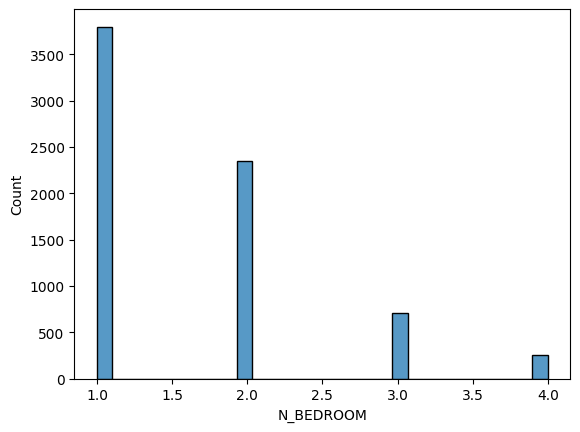

In [180]:
sns.histplot(df3['N_BEDROOM'])


1. more house has 1 bedroom
2. there are less house with 4 bedroom 

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


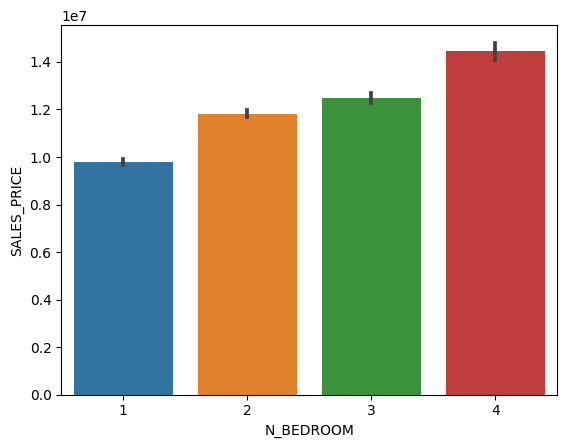

In [181]:
sns.barplot(data=df3,x='N_BEDROOM',y='SALES_PRICE')
df3[['N_BEDROOM','SALES_PRICE']].corr()

1. 4 bedroom property is expensive
2. has linear relationship

### N_BATHROOM

<AxesSubplot:xlabel='N_BATHROOM', ylabel='Count'>

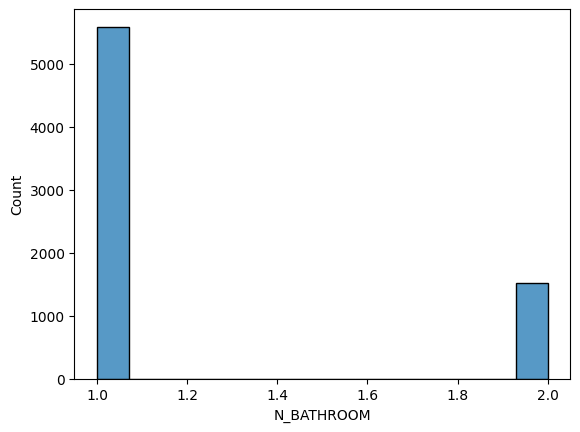

In [182]:
sns.histplot(df3['N_BATHROOM'])

1. most of the property has 1 bathroom 

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


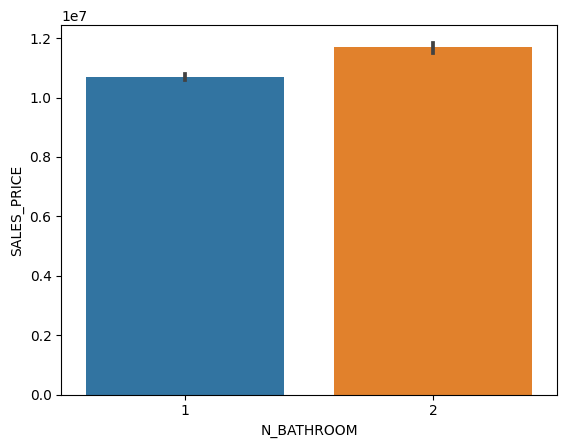

In [183]:
sns.barplot(data=df3,x='N_BATHROOM',y='SALES_PRICE')
df3[['N_BATHROOM','SALES_PRICE']].corr()

1. property with 2 bathroom are high in price
2. in plot it shows linear relationship

### N_ROOM

<AxesSubplot:xlabel='N_ROOM', ylabel='Count'>

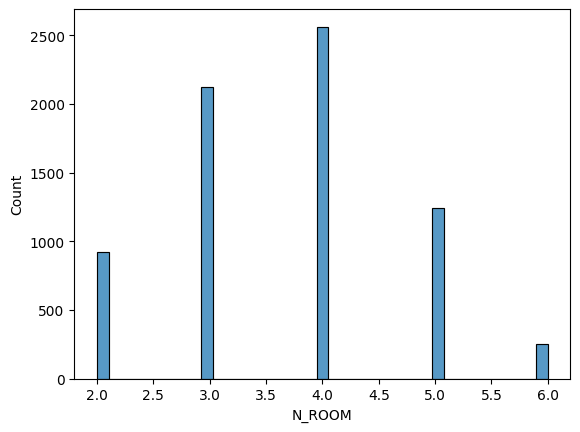

In [184]:
sns.histplot(df3['N_ROOM'])

1. most of the houses have 4 rooms
2. there are less number of house with 6 rooms

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


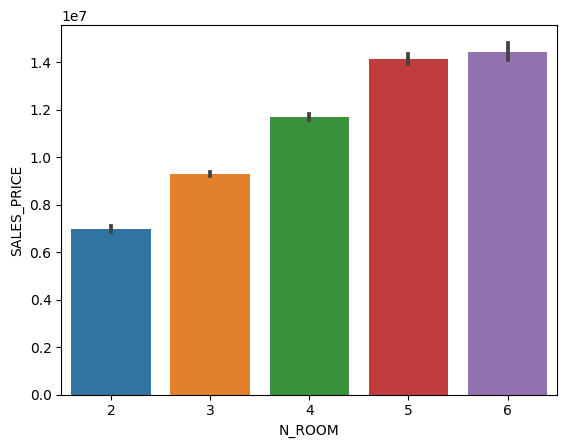

In [185]:
sns.barplot(data=df3,x='N_ROOM',y='SALES_PRICE')
df3[['N_ROOM','SALES_PRICE']].corr()

1. it has linear relationship 

### QS_ROOMS vs QS_BATHROOM vs QS_BEDROOM vs QS_OVERALL

Text(0.5, 1.0, 'QS_OVERALL')

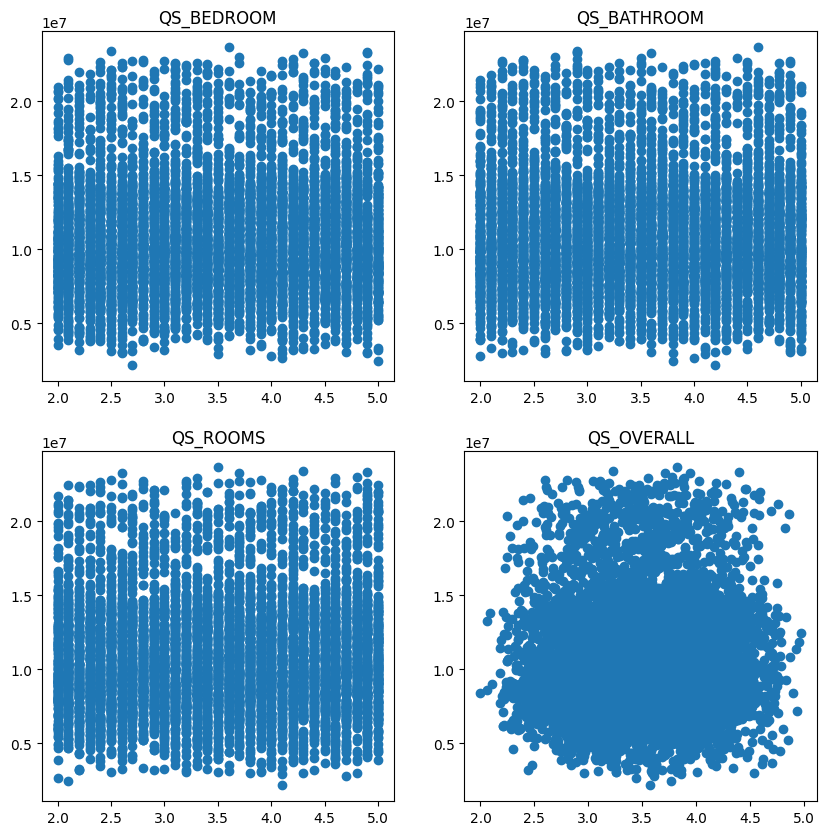

In [186]:
fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df3['QS_BEDROOM'],df3['SALES_PRICE'])
axs[0,0].set_title('QS_BEDROOM')
axs[0,1].scatter(df3['QS_BATHROOM'],df3['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')
axs[1,0].scatter(df3['QS_ROOMS'],df3['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')
axs[1,1].scatter(df3['QS_OVERALL'],df3['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')

1. no linear relationship
2. we can drop this feature

### Sold_Age

<AxesSubplot:xlabel='Sold_Age', ylabel='Count'>

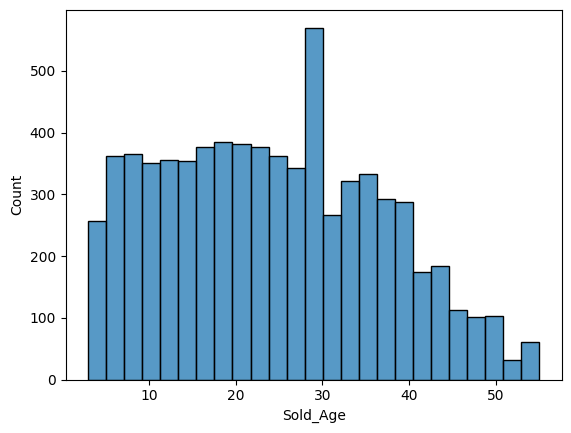

In [187]:
sns.histplot(df3['Sold_Age'])

,Sold_Age,SALES_PRICE
Sold_Age,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


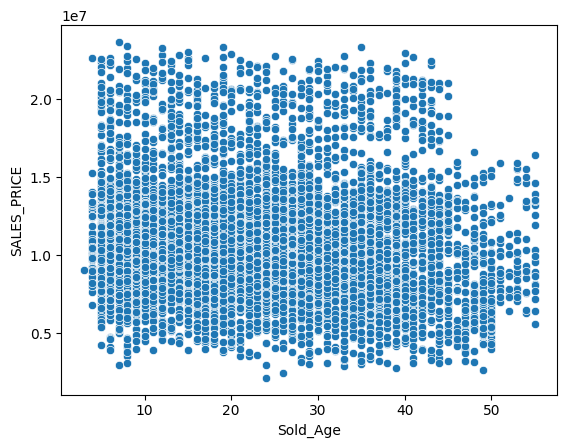

In [188]:
sns.scatterplot(data=df3,x='Sold_Age',y='SALES_PRICE')
df3[['Sold_Age','SALES_PRICE']].corr()

1. no linear relationship 
2. we can drop this 

<AxesSubplot:>

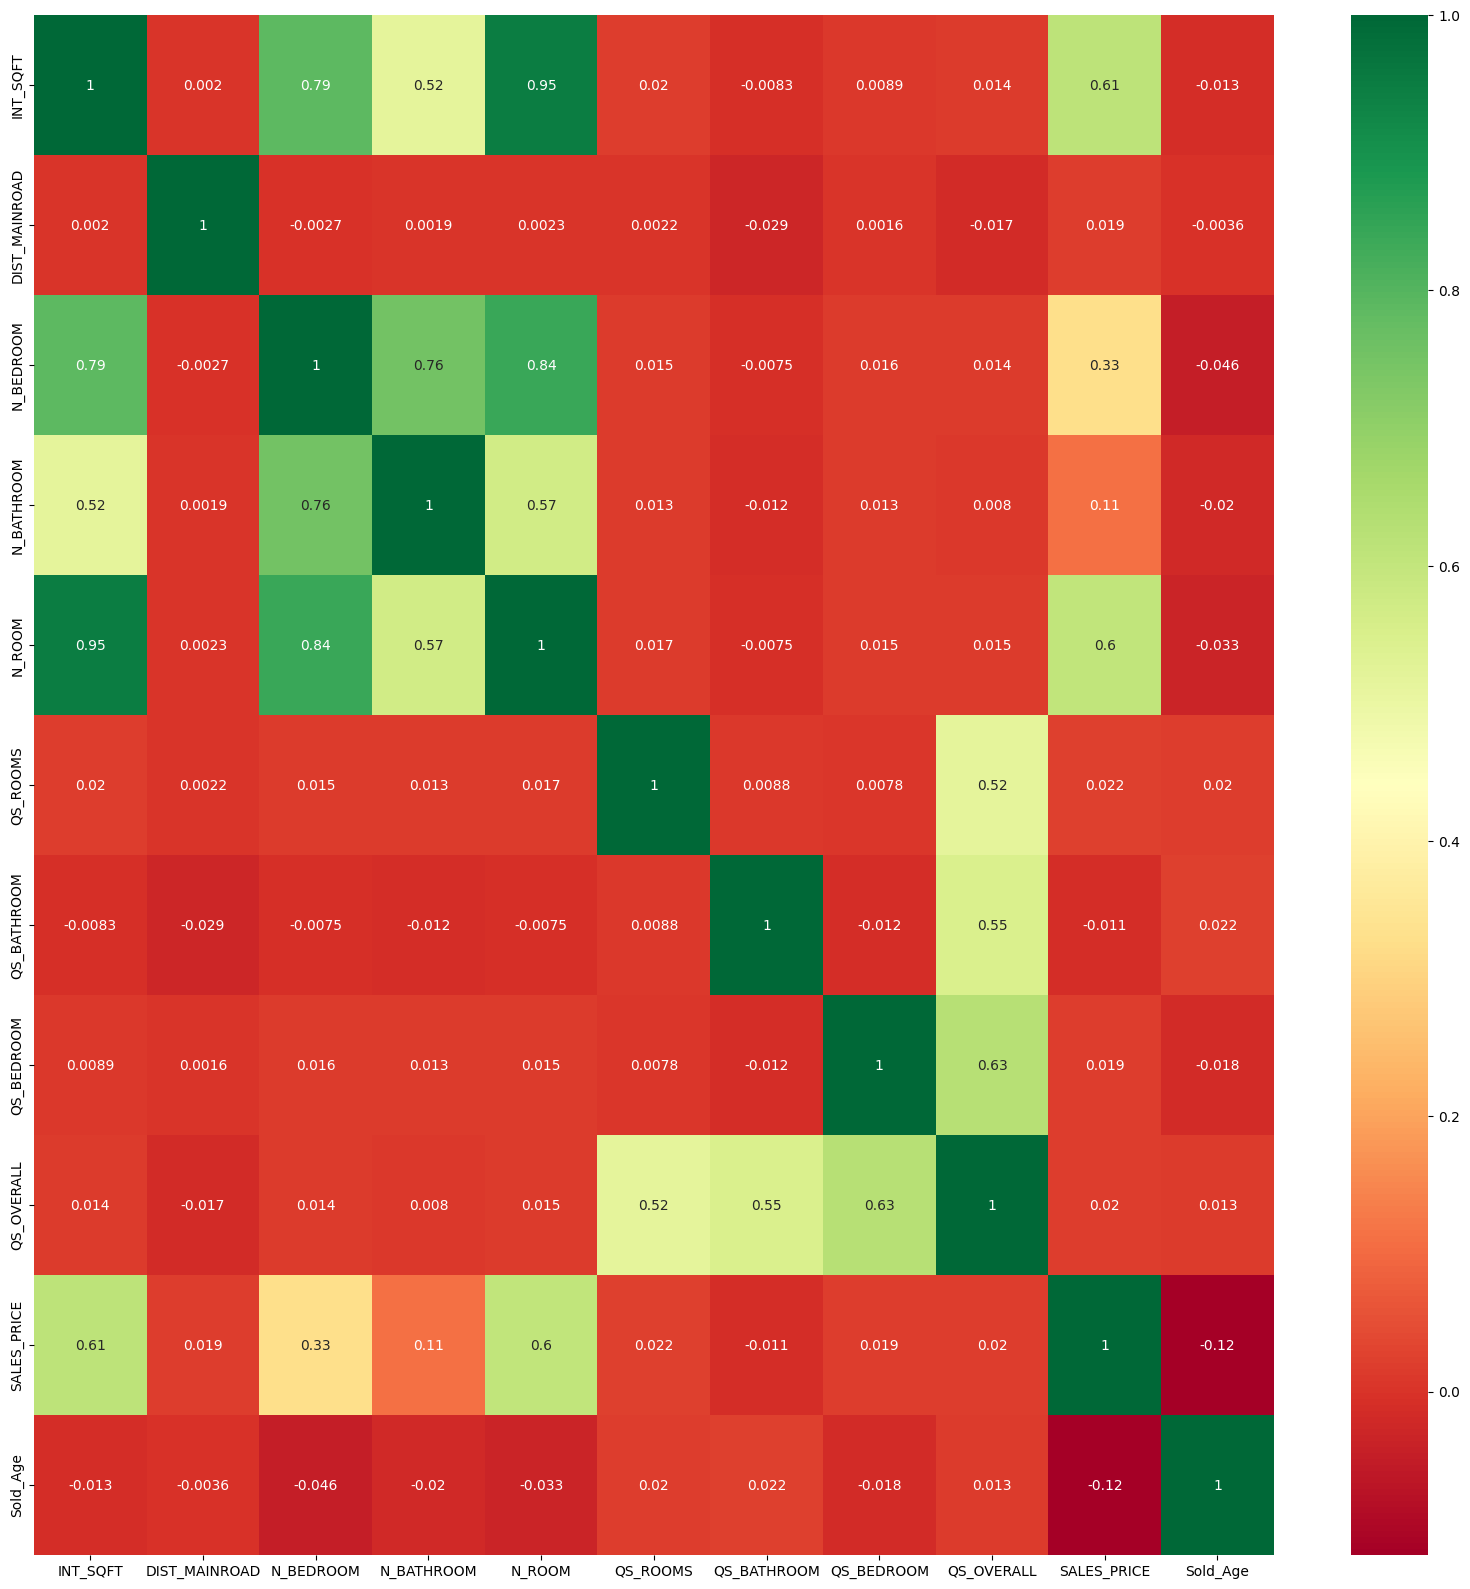

In [189]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True,cmap='RdYlGn')


In [190]:
df3.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'Sold_Age'],
      dtype='object')

In [191]:
# we can drop column which are not correlated 
df3 = df3.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DIST_MAINROAD'],axis=1)


In [192]:
df3

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Sold_Age
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,Family,No,Others,No Sewer,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,AdjLand,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,3,2,5,Family,Yes,Others,No Sewer,No Access,RH,10818480,9
7106,Velachery,1614,2,1,4,Normal Sale,No,House,No Sewer,Gravel,I,8351410,28
7107,Karapakkam,787,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,32


In [193]:
df_chennai = df3.drop(['SALES_PRICE'],axis=1)

In [194]:
categorical_feature = [x for x in df3.columns if df3[x].dtypes=='O']
print(len(categorical_features))
categorical_features

7


['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [195]:
numerical_feature = [x for x in df3.columns if df3[x].dtypes!='O']
print(len(numerical_feature))
numerical_feature

6


['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALES_PRICE', 'Sold_Age']

# Encoding

In [196]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [197]:
df3['AREA']= df3['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

In [198]:
df3['SALE_COND']=df3['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [199]:
df3['PARK_FACIL']=df3['PARK_FACIL'].map({'Yes':2,'No':1})

In [200]:
df3['UTILITY_AVAIL']=df3['UTILITY_AVAIL'].map({'ELO':1,'No Sewer':2,'AllPub':3})

In [201]:
df3['STREET']=df3['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})

In [202]:
df3['MZZONE']=df3['MZZONE'].map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})

In [203]:
dummies1 = pd.get_dummies(df3['BUILDTYPE'])

In [204]:
df3=pd.concat([df3,dummies1],axis=1)

In [205]:
df3=df3.drop('BUILDTYPE',axis=1)

In [206]:
df3

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Sold_Age,Commercial,House,Others
0,1,1004,1,1,3,3,2,3,3,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,1,3,4,5,21717770,11,1,0,0
2,2,909,1,1,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,3,2,5,2,1,2,3,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,2,3,4,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1,1,7,5353000,49,0,0,1
7105,4,1897,3,2,5,2,2,2,1,5,10818480,9,0,0,1
7106,4,1614,2,1,4,4,1,2,4,3,8351410,28,0,1,0
7107,1,787,1,1,2,1,2,1,3,6,8507000,32,1,0,0


In [207]:
# deriving X and y
X = df3.drop('SALES_PRICE',axis=1)
y = df3['SALES_PRICE']

In [208]:
X.shape,y.shape

((7109, 14), (7109,))

# train_test_split

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [211]:
import pickle
pickle.dump(scaler,open('chennai_scaling.pkl','wb'))

In [212]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5687, 14), (1422, 14), (5687,), (1422,))

# (without cross validation)

### Linear Regression

In [213]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9135080889290761

In [214]:
y_lrpred = lr.predict(X_test)
y_lrpred

array([13283924.0727989, 11416148.0727989,  9419348.0727989, ...,
        7473748.0727989, 13718100.0727989, 17240660.0727989])

In [215]:
lr.intercept_

10908244.072798898

In [216]:
lr.coef_

array([ 1.03040648e+06,  6.99008283e+05, -1.26134678e+06,  1.05779358e+05,
        1.71306899e+06,  2.28941923e+05,  5.11794105e+05,  4.00896513e+04,
        3.80940332e+05,  8.66885729e+05, -2.15893272e+05, -1.36697259e+19,
       -1.38511791e+19, -1.36791422e+19])

In [217]:
coef_df3=pd.DataFrame(lr.coef_,X.columns,columns=['Co-efficient'])
coef_df3

,Co-efficient
AREA,1.030406e+06
INT_SQFT,6.990083e+05
N_BEDROOM,-1.261347e+06
N_BATHROOM,1.057794e+05
N_ROOM,1.713069e+06
SALE_COND,2.289419e+05
PARK_FACIL,5.117941e+05
UTILITY_AVAIL,4.008965e+04
STREET,3.809403e+05
MZZONE,8.668857e+05


In [226]:
from sklearn.metrics import r2_score
metr2 = r2_score(y_test,lr.predict(X_test))
print('the R2 score for Linear regression:',metr2)

the R2 score for Linear regression: 0.9135446705513023


### XGBOOST

In [227]:
import xgboost as xgb
for lr in[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    xgb_model = xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
    xgb_model.fit(X_train,y_train)
    xgb_model.score(X_test,y_test)
    print('learning rate :',lr,' Train score :',xgb_model.score(X_train,y_train))

ModuleNotFoundError: No module named 'xgboost'

In [228]:
xgb_model=xgb.XGBRegressor(colsample_bytree=0.4,gamma=2,learning_rate=1,max_depth=6,min_child_weight=1.5,n_estimators=100)
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
print('XGBOOST model Rsquare metrics:',r2_score(y_test,xgb_pred))

NameError: name 'xgb' is not defined

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6,max_features='sqrt')
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('Radom Forest Regressor Model Rsquare Metric',r2_score(y_test,rf_pred))

Radom Forest Regressor Model Rsquare Metric 0.9308498676567127


## ENSEMBLE TECHNIQUE

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = DecisionTreeRegressor()

model = VotingRegressor(estimators=[('Linear_Regg',model1),('Random_Forest',model2),('Gradient_Boosting',model3),('Decision_Tree',model4)])
model.fit(X_train,y_train)
et_y_pred = model.predict(X_test)
print('Ensemble Technique Rsquared metric',r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.986473401125515


# WITH CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### LINEAR REGRESSION

In [ ]:
lr_model= LinearRegression()
cv_linear_regression = cross_val_score(lr_model,X_train,y_train,cv=10).mean()
print('the cross validation score of an linear_regression model is:',cv_linear_regression)

the cross validation score of an linear_regression model is: 0.9223920827315732


### XGBOOST

In [ ]:
cv_xgboost = cross_val_score(xgb_model,X_train,y_train,cv=10).mean()
print('the coss validation score for xgboost: ',cv_xgboost)

the coss validation score for xgboost:  0.9899057612501041


### RANDOM FOREST

In [ ]:
cv_randomforest= cross_val_score(rf,X_train,y_train,cv=10).mean()
print('the cross validation score for random forest:',cv_randomforest)

the cross validation score for random forest: 0.9371064330075111


### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn=KNeighborsRegressor(i)
    knn.fit(X_train,y_train) #best value of k=5,0.9443486890556109
    print('k value :',i,'cross validation acc :',np.mean(cross_val_score(knn,X_train,y_train,cv=10)))

k value : 1 cross validation acc : 0.9218452021423156
k value : 2 cross validation acc : 0.9411935955815339
k value : 3 cross validation acc : 0.9458057778122508
k value : 4 cross validation acc : 0.9465634739606541
k value : 5 cross validation acc : 0.9454239907979725
k value : 6 cross validation acc : 0.9445167217257107
k value : 7 cross validation acc : 0.9429290884336176
k value : 8 cross validation acc : 0.9423776784014599
k value : 9 cross validation acc : 0.9419215674790575
k value : 10 cross validation acc : 0.9409523843563841
k value : 20 cross validation acc : 0.931160848767114
k value : 30 cross validation acc : 0.9222080602603235
k value : 40 cross validation acc : 0.9159936444525915
k value : 50 cross validation acc : 0.9098521525145632


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn=KNeighborsRegressor(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9449475062662502

### DECISION TREE

In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in[1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
    dt= DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train,y_train)
    acc=r2_score(y_test,dt.predict(X_test)) #k=40
    val=cross_val_score(dt,X,y,cv=10)
    print('k:',depth,'R2 Score: ',acc,'cross val score: ',np.mean(val))

k: 1 R2 Score:  0.3446294493297457 cross val score:  0.3588875752516194
k: 2 R2 Score:  0.6755840372372105 cross val score:  0.6819059001742293
k: 3 R2 Score:  0.798453615178353 cross val score:  0.8016324100218641
k: 4 R2 Score:  0.8737342851269079 cross val score:  0.8820146308226893
k: 5 R2 Score:  0.9108117203731454 cross val score:  0.9151939950985589
k: 6 R2 Score:  0.9326451965332645 cross val score:  0.9358665043374771
k: 7 R2 Score:  0.9476597341300074 cross val score:  0.9505404259155558
k: 8 R2 Score:  0.9589758883963571 cross val score:  0.9620615673764927
k: 9 R2 Score:  0.9655529852809591 cross val score:  0.9691010022996711
k: 10 R2 Score:  0.9705305553637172 cross val score:  0.9729746620395548
k: 20 R2 Score:  0.9753077061405514 cross val score:  0.9768770384000449
k: 40 R2 Score:  0.9757305601094046 cross val score:  0.9765357502514714
k: 60 R2 Score:  0.974649597866884 cross val score:  0.9766786102222627
k: 70 R2 Score:  0.974007276016715 cross val score:  0.9765996

In [ ]:
dt= DecisionTreeRegressor(max_depth=40)
dt.fit(X_train,y_train)
acc=r2_score(y_test,dt.predict(X_test))
print('the r2 score for Decision Tree Regressor: ',acc)

the r2 score for Decision Tree Regressor:  0.9750274454199861


### FEATURE IMPORTANCE

In [ ]:
dt = DecisionTreeRegressor(max_depth= 40)
dt.fit(X_train,y_train)
importance = list(dt.feature_importances_)
feature_importance = [(feature,round(importance,2)) for feature, importance in zip(list(X.columns),importance)]
feature_importance = sorted(feature_importance,key = lambda x:x[1], reverse = True)
feature_importance

[('AREA', 0.48),
 ('Commercial', 0.32),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('Sold_Age', 0.0),
 ('House', 0.0),
 ('Others', 0.0)]

# Evaluation metrics of all models constructed:
* The r2 score of Linear Regression model is : **0.9226277909046083**
* The cross_val score of Linear Regression model is : **0.9203151625242294**
* The r2 score for K Nearest Neighbour : **0.9482108236374674**
* The r2 score for XGBOOST : **0.9905451192646576**
* The cross_val score of XG_Boost regessor model is :**0.9893216842037393**
* The r2 score for RANDOM FOREST : **0.9411809036503157**
* The cross_val score of RANDOM FOREST : **0.9363807658323807** 
* The r2 score for ENSEMBLE TECHNIQUE : **0.9881649164042053**
* The r2 score of Decison tree regressor: **0.976870274472669**



# SUGGESTION TO BUYERS AND REAL ESTATE AGENTS.

**TO REAL ESTATE AGENT**

1. if any agent wants to build a property in  chennai. according to the data i would sugget them to build a "commercial" type building.
2. when it comes to location i would suggest them "T Nagar" followed by "Anna Nagar" and then "KK Nagar" because the average/minimum/maximum price is higher compare to all other area soo the profit wil also be higher for agents.
3. also i would suggest them to build properties with "all utility", "parking facility" and Gravel type Street because they fetch more profit than Paved Street.
4. i would strongly suggest them not to build any property which has no facility access to the building.


**TO BUYERS**

price of the property changes due to various factors.
1. based o whether the property is commercial,others or house.
2. based on location of the property.
3. property with parking facilities is expensive.
4. zone of the property also should be notable.
5. if buyers want a cheapest price range.select properties which are in Area "Karapakam" 

# prediction of new data

In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df_chennai

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,Sold_Age,Commercial,House,Others
0,1,1004,1,1,3,3,2,3,3,1,44,1,0,0
1,6,1986,2,1,5,3,1,3,4,5,11,1,0,0
2,2,909,1,1,3,3,2,1,4,6,20,1,0,0
3,4,1855,3,2,5,2,1,2,3,3,22,0,0,1
4,1,1226,1,1,3,3,2,3,4,2,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1,1,7,49,0,0,1
7105,4,1897,3,2,5,2,2,2,1,5,9,0,0,1
7106,4,1614,2,1,4,4,1,2,4,3,28,0,1,0
7107,1,787,1,1,2,1,2,1,3,6,32,1,0,0


In [ ]:
df_chennai.values[0].reshape(1,-1)

array([[   1, 1004,    1,    1,    3,    3,    2,    3,    3,    1,   44,
           1,    0,    0]], dtype=int64)

In [ ]:
# transformation of new data
scaler.transform(df_chennai.values[0].reshape(1,-1))

array([[-1.36668727, -0.81653347, -0.78565949, -0.5245113 , -0.66288982,
        -0.00297445,  0.99456375,  1.37057709,  0.17688134, -2.17926573,
         1.5909949 ,  1.43154803, -0.72461973, -0.69826585]])

In [ ]:
xgb_model.predict(scaler.transform(df_chennai.values[0].reshape(1,-1)))

array([7658482.], dtype=float32)

# Pickling the model file for Deployment 

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb_model,open('chennai_xgbmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('chennai_xgbmodel.pkl','rb'))

In [ ]:
pickled_model.predict(scaler.transform(df_chennai.values[0].reshape(1,-1)))

array([7658482.], dtype=float32)